In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bankruptcy-prevention.csv to bankruptcy-prevention.csv


In [3]:
bankrupt=pd.read_csv('bankruptcy-prevention.csv',sep=';')
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [4]:
bankrupt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print(bankrupt.info())
print(bankrupt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


In [7]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [8]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [9]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


Here we are changing the target variable to bankruptcy=0,non=bankruptcy=1

In [10]:
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0

In [11]:
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [12]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


Exploratory Data Analysis(EDA)

In [13]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


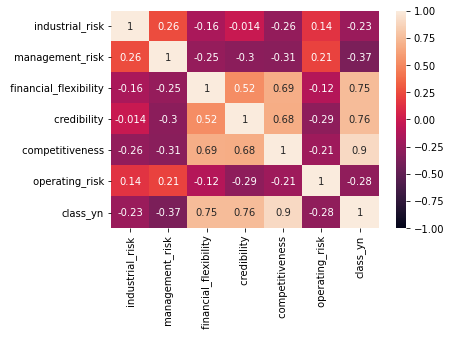

In [14]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

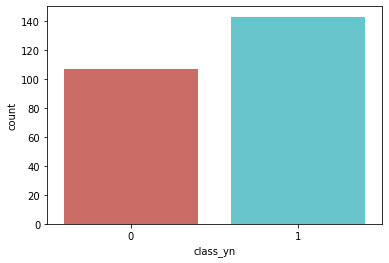

In [15]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

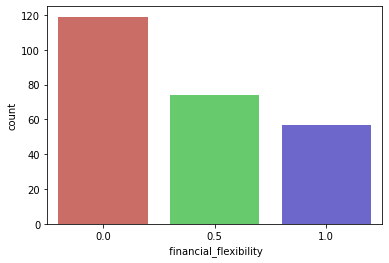

In [16]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

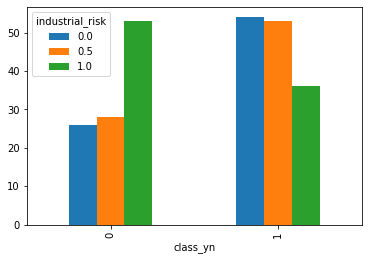

In [17]:

# for visualization 

pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

In [18]:
bankrupt_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

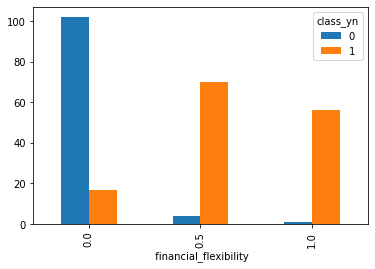

In [19]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')

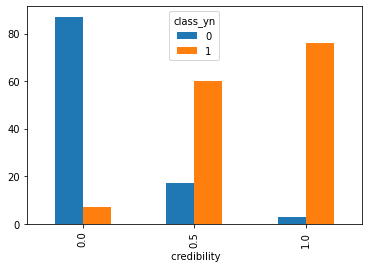

In [20]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

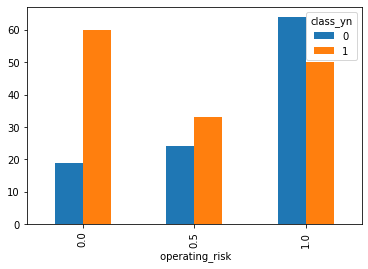

In [21]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

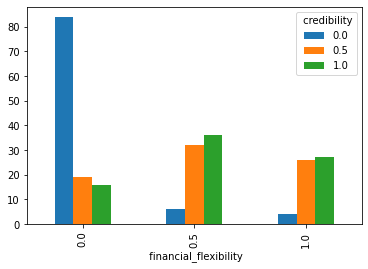

In [22]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')

In [23]:
np.shape(bankrupt_new)


(250, 7)

In [24]:
# Input
x = bankrupt_new.iloc[:,:-1]

# Target variable

y = bankrupt_new.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report


Splitting the data into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


In [37]:
def Visualize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['No Bankruptcy','Bankruptcy'], yticklabels=['No Bankruptcy','Bankruptcy'])
    plt.title('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    print("\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    return

Preparing Models

1.Logistic Regression

Training the Logestic Regression on the Training test


In [32]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

In [33]:
# Train Score
train_score = LR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9947


Testing the Logistic Regression on the Testing set

In [34]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


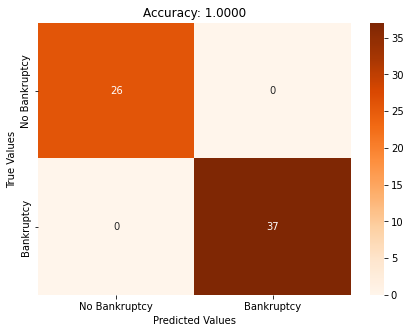



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [39]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

2.Naive Bayes

Training the Naive Bayes on the training set

In [40]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred)

In [41]:
# Train Score
train_score = NB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9733


Testing the Naive Bayes on the testing set

In [42]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


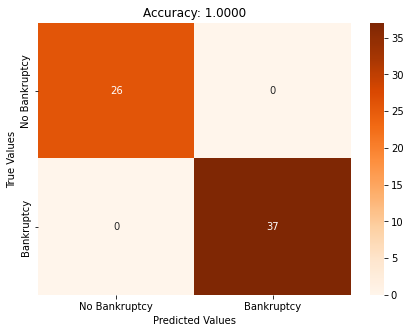



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [43]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

3. KNN

Training the KNN model on the training set

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred)

In [45]:
# Train Score
train_score = KNN_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9893


Testing of KNN on the tesing set

In [46]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.9730
Precision score: 1.0000
F1-Score: 0.9863
Accuracy score: 0.9841


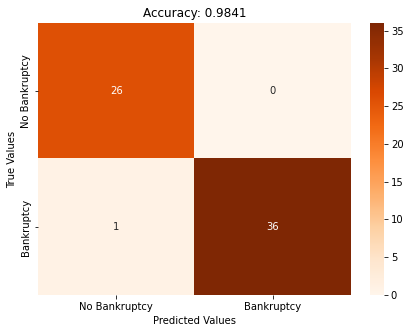



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [47]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

4. Decision Tree

Training Decision Tree Classification on Train set

In [48]:
from sklearn.tree import DecisionTreeClassifier
DTR_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTR_model.fit(X_train, y_train)
y_pred = DTR_model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred)

In [49]:
# Train Score
train_score = DTR_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


Testing Decision Tree Classifier on the Testing Set

In [50]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 0.9730
Precision score: 1.0000
F1-Score: 0.9863
Accuracy score: 0.9841


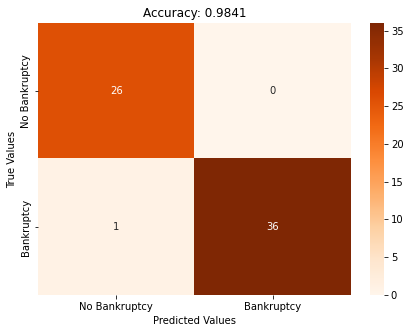



Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        37

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.98      0.98      0.98        63



In [51]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

5.Random Forest

Training the Random Foest classification on the Training set

In [52]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred)

In [53]:
# Train Score
train_score = RF_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


Testing the Random classification model on the testing set

In [54]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


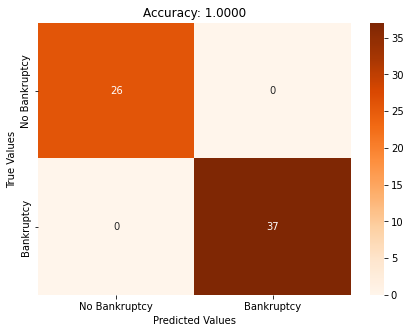



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [55]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

6. Support Vector Machine

Training the SVM on the training set

In [56]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0, probability=True)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
acc6 = accuracy_score(y_test, y_pred)

In [57]:
# Train Score
train_score = SVM_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 0.9947


Testing the SVM on the testing set

In [58]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


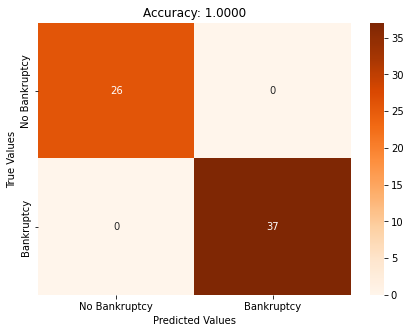



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [59]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

7.XGBoost

Training the XGBoost model on the Training set

In [60]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
acc7 = accuracy_score(y_test, y_pred)

In [61]:
# Train Score
train_score = XGB_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


Testing the XGBoost on the training set

In [63]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


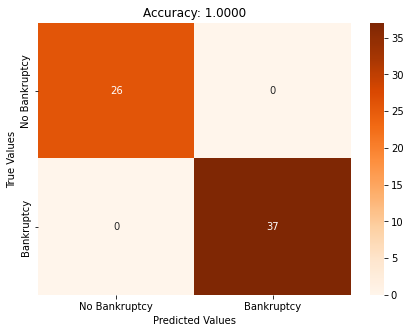



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [64]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

8.CatBoost

Training CatBoost on the Training Set

In [70]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.3 MB/s eta 0:00:00


In [71]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
acc8 = accuracy_score(y_test, y_pred)

Learning rate set to 0.005035
0:	learn: 0.6833416	total: 47.1ms	remaining: 47.1s
1:	learn: 0.6733467	total: 48.2ms	remaining: 24.1s
2:	learn: 0.6640309	total: 48.9ms	remaining: 16.2s
3:	learn: 0.6521851	total: 49.7ms	remaining: 12.4s
4:	learn: 0.6459277	total: 50.7ms	remaining: 10.1s
5:	learn: 0.6385954	total: 51.5ms	remaining: 8.53s
6:	learn: 0.6302216	total: 52.2ms	remaining: 7.4s
7:	learn: 0.6214720	total: 52.8ms	remaining: 6.55s
8:	learn: 0.6149495	total: 53.5ms	remaining: 5.89s
9:	learn: 0.6072891	total: 54.3ms	remaining: 5.37s
10:	learn: 0.5997448	total: 55ms	remaining: 4.94s
11:	learn: 0.5920624	total: 55.7ms	remaining: 4.58s
12:	learn: 0.5826525	total: 56.4ms	remaining: 4.28s
13:	learn: 0.5741440	total: 57.2ms	remaining: 4.03s
14:	learn: 0.5674722	total: 57.9ms	remaining: 3.8s
15:	learn: 0.5596726	total: 58.9ms	remaining: 3.62s
16:	learn: 0.5528934	total: 59.5ms	remaining: 3.44s
17:	learn: 0.5465110	total: 60.2ms	remaining: 3.29s
18:	learn: 0.5390926	total: 61ms	remaining: 3.15

In [72]:
# Train Score
train_score = catboost_model.score(X_train, y_train)
print('Training Score: %0.4f'% train_score)

Training Score: 1.0000


Testing The CatBoost model on the testing set

In [73]:
# Test score
print('Recall score: %0.4f'% recall_score(y_test, y_pred))
print('Precision score: %0.4f'% precision_score(y_test, y_pred))
print('F1-Score: %0.4f'% f1_score(y_test, y_pred))
print('Accuracy score: %0.4f'% accuracy_score(y_test, y_pred))

Recall score: 1.0000
Precision score: 1.0000
F1-Score: 1.0000
Accuracy score: 1.0000


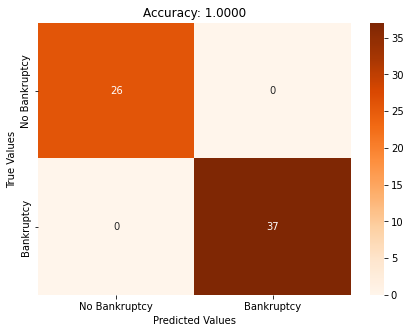



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [74]:
# Test Predictions
Visualize_confusion_matrix(y_test, y_pred)

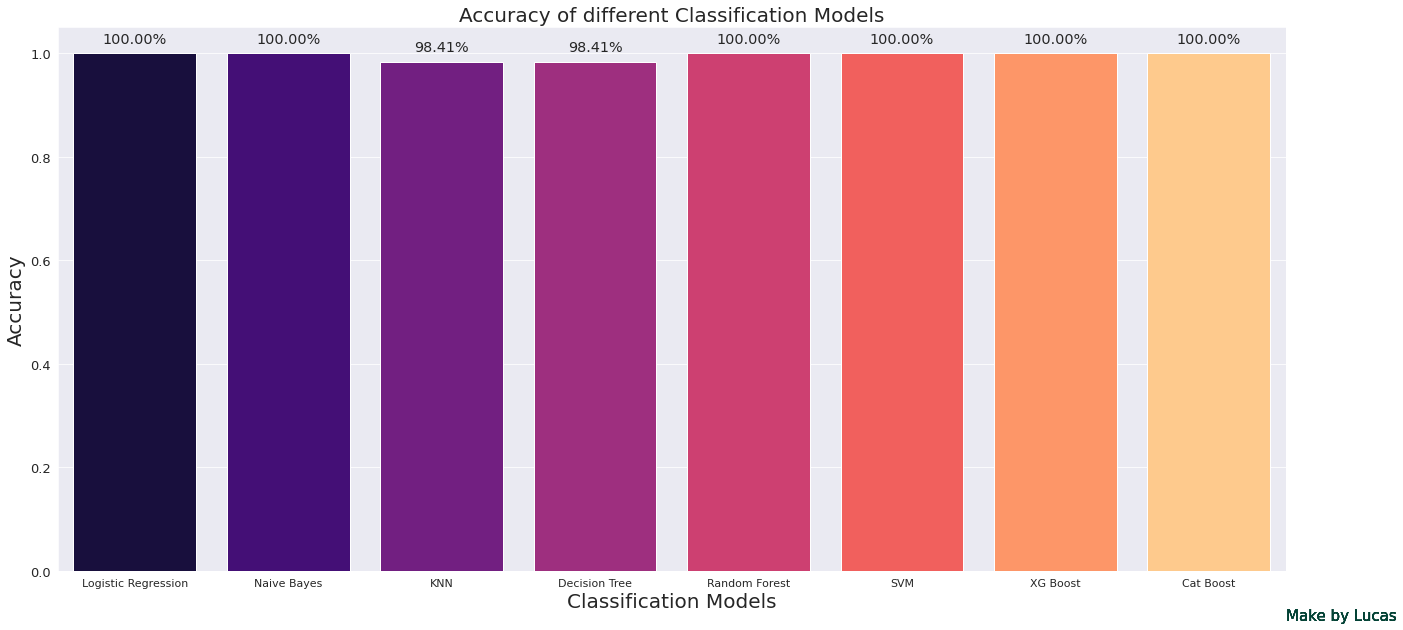

In [81]:

mylist=[]
mylist2=[]

mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("Naive Bayes")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Decision Tree")
mylist.append(acc5)
mylist2.append("Random Forest")
mylist.append(acc6)
mylist2.append("SVM")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")


plt.figure(figsize=(22, 10))
sns.set_style("darkgrid")
ax = sns.barplot(x = mylist2, y = mylist, palette = "magma", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')

    # Add Text watermark
    plt.text(7.5, -0.1, 'Make by Lucas', fontsize = 15,
             color ='#034235', ha ='left', va ='bottom',
             alpha = 0.7)
       
plt.show();